In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from collections import defaultdict

# Defining all paths
base_dir = '/content/drive/My Drive/Colab Notebooks/food_items'
splits = ['train', 'val', 'test']
split_stats = {}

# Loop through each split
for split in splits:
    split_path = os.path.join(base_dir, split)
    class_counts = defaultdict(int)
    total_images = 0
    class_names = []

    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            image_files = [
                f for f in os.listdir(class_path)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))
            ]
            count = len(image_files)
            class_counts[class_name] = count
            total_images += count
            class_names.append(class_name)

    split_stats[split] = {
        'total_images': total_images,
        'num_classes': len(class_counts),
        'class_counts': class_counts,
        'class_names': sorted(class_names)
    }

# Checking class consistency across all splits
train_classes = set(split_stats['train']['class_names'])
val_classes = set(split_stats['val']['class_names'])
test_classes = set(split_stats['test']['class_names'])

print("Split Summary:")
for split in splits:
    print(f"{split.upper()} — {split_stats[split]['num_classes']} classes, {split_stats[split]['total_images']} images")

print("\n Class Matching Check:")
print("Classes in all splits identical? ", train_classes == val_classes == test_classes)
print("Classes only in train:", train_classes - val_classes - test_classes)
print("Classes only in val:", val_classes - train_classes - test_classes)
print("Classes only in test:", test_classes - train_classes - val_classes)

Split Summary:
TRAIN — 101 classes, 70705 images
VAL — 101 classes, 15150 images
TEST — 101 classes, 15154 images

 Class Matching Check:
Classes in all splits identical?  True
Classes only in train: set()
Classes only in val: set()
Classes only in test: set()


In [ ]:
import os
from collections import defaultdict

# Using the confirmed train directory
train_dir = '/content/drive/My Drive/Colab Notebooks/food_items/train'

# Counting the number of images per class
class_counts = defaultdict(int)

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        class_counts[class_name] = len(image_files)

# Sorting the image count (descending)
sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)


print("Top 20 food classes by image count:")
for name, count in sorted_classes[:20]:
    print(f"{name}: {count} images")

Top 20 food classes by image count:
hamburger: 704 images
huevos_rancheros: 701 images
baby_back_ribs: 700 images
beef_tartare: 700 images
baklava: 700 images
beef_carpaccio: 700 images
apple_pie: 700 images
beet_salad: 700 images
bibimbap: 700 images
beignets: 700 images
breakfast_burrito: 700 images
caprese_salad: 700 images
bread_pudding: 700 images
cannoli: 700 images
carrot_cake: 700 images
ceviche: 700 images
caesar_salad: 700 images
bruschetta: 700 images
chicken_wings: 700 images
chicken_curry: 700 images


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
from pathlib import Path
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define source and target directories
original_base = Path("/content/drive/MyDrive/food_subset")
target_dir = Path("/content/drive/MyDrive/food_subset_shared_final")

# Step 3: Define selected categories
categories = {
    "main_course": ["chicken_curry", "hamburger", "fried_rice", "caesar_salad"],
    "dessert": ["apple_pie", "ice_cream", "carrot_cake", "baklava"]
}

# Step 4: Limit number of images per class
MAX_IMAGES = 100

# Step 5: Copy files to new structure
for split in ["train", "val", "test"]:
    src_split_path = original_base / split
    dst_split_path = target_dir / split

    for label, foods in categories.items():
        for food in foods:
            src = src_split_path / food
            dst = dst_split_path / label
            dst.mkdir(parents=True, exist_ok=True)
            if src.exists():
                files = sorted(os.listdir(src))[:MAX_IMAGES]
                for file in files:
                    full_file = src / file
                    if full_file.is_file():
                        shutil.copy(full_file, dst)

# Step 6: summary of what was saved
subset_summary = {
    split: {
        label: len(os.listdir(target_dir / split / label))
        for label in os.listdir(target_dir / split)
    }
    for split in ["train", "val", "test"]
}

subset_summary

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


{'train': {'main_course': 400, 'dessert': 200},
 'val': {'main_course': 400, 'dessert': 200},
 'test': {'main_course': 400, 'dessert': 200}}

In [ ]:
import os
import pandas as pd

base_dir = "/content/drive/MyDrive/food_subset_shared_final"
split_counts = {}

for split in ["train", "val", "test"]:
    total = 0
    split_path = os.path.join(base_dir, split)
    if not os.path.exists(split_path):
        print(f"Folder not found: {split_path}")
        continue
    for category in os.listdir(split_path):
        class_dir = os.path.join(split_path, category)
        if os.path.isdir(class_dir):
            total += len(os.listdir(class_dir))
    split_counts[split] = total

total_images = sum(split_counts.values())

if total_images == 0:
    print(" No images found in any split. Please check the folder structure.")
else:
    for split, count in split_counts.items():
        ratio = round((count / total_images) * 100, 2)
        print(f"{split.upper():<5} → {count} images ({ratio}%)")

TRAIN → 600 images (33.33%)
VAL   → 600 images (33.33%)
TEST  → 600 images (33.33%)


In [ ]:
import os
from PIL import Image
import pandas as pd

# Set your dataset base path
base_dir = "/content/drive/MyDrive/food_subset_shared_final"

# To collect invalid image info
corrupt_images = []

# Loop through each split folder
for split in ["train", "val", "test"]:
    split_path = os.path.join(base_dir, split)
    if os.path.exists(split_path):
        for category in os.listdir(split_path):
            category_path = os.path.join(split_path, category)
            if os.path.isdir(category_path):
                for fname in os.listdir(category_path):
                    file_path = os.path.join(category_path, fname)
                    try:
                        with Image.open(file_path) as img:
                            img.verify()  # Check for file corruption
                    except Exception as e:
                        corrupt_images.append({
                            "Split": split,
                            "Category": category,
                            "File": fname,
                            "Error": str(e)
                        })

# Creating summary table
df_corrupt = pd.DataFrame(corrupt_images)

#results
if df_corrupt.empty:
    print(" All images are valid. No corrupt images found.")
else:
    print(" Found corrupt images:")
    print(df_corrupt)

✅ All images are valid. No corrupt images found.


In [ ]:
import os
import shutil
import random
from tqdm import tqdm

# Step 1: Set paths
original_data_dir = "/content/drive/MyDrive/food_subset_shared_final/train"
resplit_dir = "/content/drive/MyDrive/food_subset_resplit_70_10_10"


# Step 3: Clean old folder if exists
if os.path.exists(resplit_dir):
    shutil.rmtree(resplit_dir)

# Step 4: Create folder structure
splits = ["train", "val", "test"]
categories = ["main_course", "dessert"]

for split in splits:
    for category in categories:
        os.makedirs(os.path.join(resplit_dir, split, category), exist_ok=True)

# Step 5: Perform splitting
for category in tqdm(categories, desc="Processing categories"):
    category_path = os.path.join(original_data_dir, category)
    files = [f for f in os.listdir(category_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(files)

    total = len(files)
    train_end = int(0.7 * total)
    val_end = train_end + int(0.1 * total)

    split_map = {
        "train": files[:train_end],
        "val": files[train_end:val_end],
        "test": files[val_end:]
    }

    for split, split_files in split_map.items():
        for f in split_files:
            src = os.path.join(category_path, f)
            dst = os.path.join(resplit_dir, split, category, f)
            shutil.copy2(src, dst)

print(" Done: Images re-split into 70% train, 10% val, 10% test.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing categories: 100%|██████████| 2/2 [00:06<00:00,  3.40s/it]

✅ Done: Images re-split into 70% train, 10% val, 10% test.


In [ ]:

resplit_dir = "/content/drive/MyDrive/food_subset_resplit_70_10_10"

split_counts = {}
total_images = 0

for split in ["train", "val", "test"]:
    count = 0
    split_path = os.path.join(resplit_dir, split)
    if not os.path.exists(split_path):
        print(f"Folder not found: {split_path}")
        continue
    for category in os.listdir(split_path):
        category_path = os.path.join(split_path, category)
        count += len([img for img in os.listdir(category_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))])
    split_counts[split] = count
    total_images += count

#summary
print("Final Image Split Summary:")
for split, count in split_counts.items():
    ratio = round((count / total_images) * 100, 2) if total_images else 0
    print(f"{split.upper():<5} → {count} images ({ratio}%)")

Final Image Split Summary:
TRAIN → 420 images (70.0%)
VAL   → 60 images (10.0%)
TEST  → 120 images (20.0%)


In [ ]:
# STEP 1: Install CLIP dependencies
!pip install -q ftfy regex tqdm
!pip install -q git+https://github.com/openai/CLIP.git

# STEP 2: Import libraries
import os
import clip
import torch
from PIL import Image
from tqdm import tqdm

# STEP 3: Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# STEP 4: Set paths
base_path = "/content/drive/MyDrive/food_subset_resplit_70_10_10/train"
output_path = "/content/drive/MyDrive/filtered_food_subset/train"
os.makedirs(output_path, exist_ok=True)

# STEP 5: Define valid "pure food" prompts
keep_prompts = [
    "a plate of food",
    "a cooked dish",
    "delicious meal",
    "plated meal",
    "served food"
]
text_tokens = clip.tokenize(keep_prompts).to(device)

# STEP 6: Filter images based on similarity to food prompts
for category in os.listdir(base_path):
    cat_path = os.path.join(base_path, category)
    if not os.path.isdir(cat_path):
        continue

    save_path = os.path.join(output_path, category)
    os.makedirs(save_path, exist_ok=True)

    for filename in tqdm(os.listdir(cat_path), desc=f"Filtering {category}"):
        img_path = os.path.join(cat_path, filename)
        try:
            image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
            with torch.no_grad():
                image_features = model.encode_image(image)
                text_features = model.encode_text(text_tokens)

                similarity = (image_features @ text_features.T).softmax(dim=-1)
                best_score = similarity[0].max().item()

                # Keep image only if it strongly matches "pure food"
                if best_score > 0.25:
                    Image.open(img_path).save(os.path.join(save_path, filename))
        except:
            continue

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.8 MB/s eta 0:00:00


100%|███████████████████████████████████████| 338M/338M [00:19<00:00, 18.0MiB/s]
Filtering dessert: 100%|██████████| 140/140 [00:08<00:00, 17.47it/s]


In [ ]:
import os
import clip
import torch
from PIL import Image
from tqdm import tqdm

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Define prompts to keep food-only images
keep_prompts = [
    "a plate of food", "a cooked dish", "delicious meal",
    "plated meal", "served food"
]
text_tokens = clip.tokenize(keep_prompts).to(device)

# Base directories
base_input_dir = "/content/drive/MyDrive/food_subset_resplit_70_10_10"
base_output_dir = "/content/drive/MyDrive/filtered_food_subset"
os.makedirs(base_output_dir, exist_ok=True)

# Only filter val and test
for split in ["val", "test"]:
    input_dir = os.path.join(base_input_dir, split)
    output_dir = os.path.join(base_output_dir, split)
    os.makedirs(output_dir, exist_ok=True)

    for category in os.listdir(input_dir):
        cat_path = os.path.join(input_dir, category)
        if not os.path.isdir(cat_path):
            continue

        save_path = os.path.join(output_dir, category)
        os.makedirs(save_path, exist_ok=True)

        for filename in tqdm(os.listdir(cat_path), desc=f"Filtering {split}/{category}"):
            img_path = os.path.join(cat_path, filename)
            try:
                image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
                with torch.no_grad():
                    image_features = model.encode_image(image)
                    text_features = model.encode_text(text_tokens)
                    similarity = (image_features @ text_features.T).softmax(dim=-1)
                    best_score = similarity[0].max().item()

                    if best_score > 0.25:
                        Image.open(img_path).save(os.path.join(save_path, filename))
            except:
                continue

Filtering test/dessert: 100%|██████████| 40/40 [00:21<00:00,  1.85it/s]


In [ ]:
filtered_base = "/content/drive/MyDrive/filtered_food_subset"

def check_split_ratios(base_dir):
    split_counts = {}
    total_images = 0

    for split in ["train", "val", "test"]:
        split_path = os.path.join(base_dir, split)
        image_count = 0

        if not os.path.exists(split_path):
            print(f" Missing folder: {split_path}")
            continue

        for category in os.listdir(split_path):
            category_path = os.path.join(split_path, category)
            if os.path.isdir(category_path):
                count = len([
                    f for f in os.listdir(category_path)
                    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
                ])
                image_count += count

        split_counts[split] = image_count
        total_images += image_count

    print(f"\n Total images across all splits: {total_images}\n")
    for split, count in split_counts.items():
        percent = (count / total_images * 100) if total_images > 0 else 0
        print(f"{split.upper():<5} → {count} images ({percent:.2f}%)")

# Run the check
check_split_ratios(filtered_base)


📊 Total images across all splits: 600

TRAIN → 420 images (70.00%)
VAL   → 60 images (10.00%)
TEST  → 120 images (20.00%)


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Paths
train_dir = "/content/drive/MyDrive/filtered_food_subset/train"
val_dir = "/content/drive/MyDrive/filtered_food_subset/val"

# Parameters
img_size = (224, 224)
batch_size = 32
epochs = 30

# 1. Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# 2. Load Pretrained VGG16 (no top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 3. Unfreeze only last few layers
for layer in base_model.layers[:-10]:
    layer.trainable = False

# 4. Add custom classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# 5. Compile
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

# 7. Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=callbacks
)

# 8. Save Model
model.save("/content/drive/MyDrive/food_classifier_vgg16_final.h5")

Found 420 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 181s 11s/step - accuracy: 0.5544 - loss: 0.9221 - val_accuracy: 0.6500 - val_loss: 0.6027 - learning_rate: 1.0000e-05
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 625ms/step - accuracy: 0.6737 - loss: 0.6625 - val_accuracy: 0.6333 - val_loss: 0.5853 - learning_rate: 1.0000e-05
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 558ms/step - accuracy: 0.6887 - loss: 0.6528 - val_accuracy: 0.6333 - val_loss: 0.5794 - learning_rate: 1.0000e-05
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 539ms/step - accuracy: 0.7742 - loss: 0.4899 - val_accuracy: 0.6500 - val_loss: 0.5758 - learning_rate: 1.0000e-05
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 603ms/step - accuracy: 0.7214 - loss: 0.5582 - val_accuracy: 0.6667 - val_loss: 0.5646 - learning_rate: 1.0000e-05
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 568ms/step - accuracy: 0.7312 - loss: 0.5305 - val_accuracy: 0.6667 - val_loss: 0.5521 - learning_rate: 1.0000e-05
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 559ms/step - accuracy:

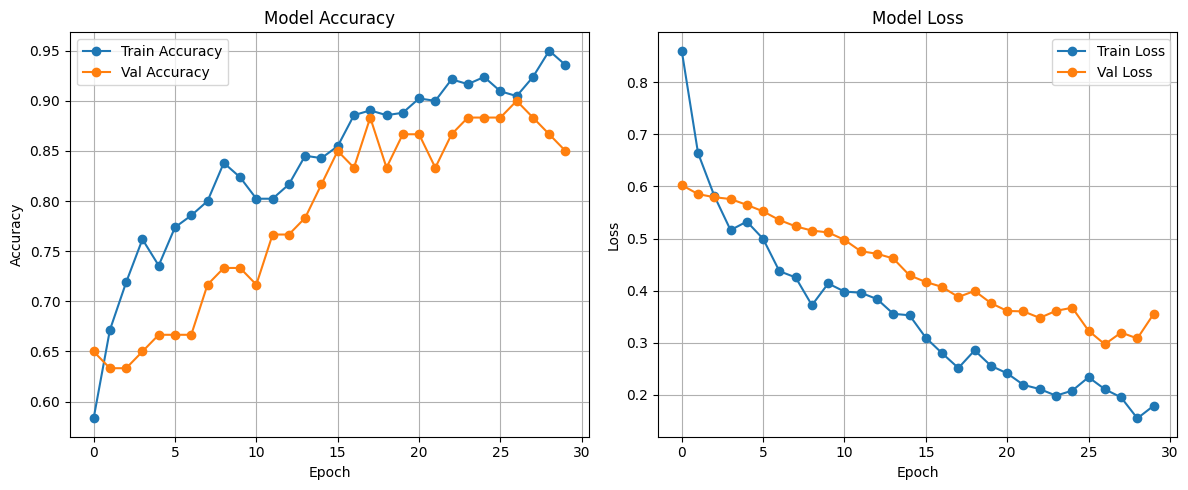

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
"/content/drive/MyDrive/food_classifier_vgg16_final.h5"

'/content/drive/MyDrive/food_classifier_vgg16_final.h5'

Found 120 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 45s 11s/step
📊 Classification Report:
              precision    recall  f1-score   support

     dessert       0.71      0.62      0.67        40
 main_course       0.82      0.88      0.85        80

    accuracy                           0.79       120
   macro avg       0.77      0.75      0.76       120
weighted avg       0.79      0.79      0.79       120



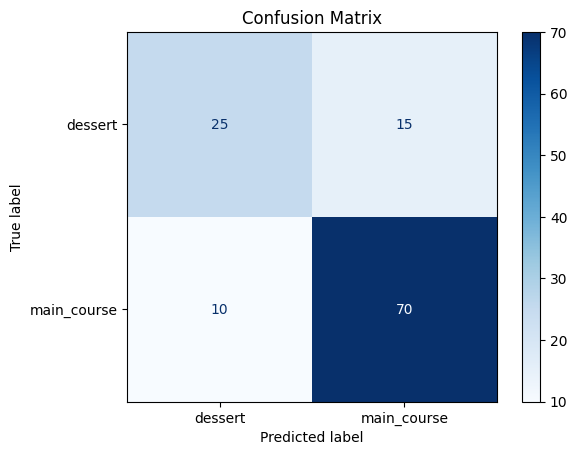

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/food_classifier_vgg16_final.h5')

# Define the test directory
test_dir = '/content/drive/MyDrive/filtered_food_subset/test'

# Set up image generator
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict
predictions = model.predict(test_gen)
y_pred = np.argmax(predictions, axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Print results
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Dataset Paths
train_dir = "/content/drive/MyDrive/filtered_food_subset/train"
val_dir = "/content/drive/MyDrive/filtered_food_subset/val"

# ⚙️ Parameters
img_size = (224, 224)
batch_size = 32
epochs = 40

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    shear_range=0.2,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load Pretrained DenseNet201
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze last 20 layers
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Custom Classifier Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

#  Compile
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#  Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3)
]

#  Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=callbacks
)

#  Save Model
model.save("/content/drive/MyDrive/food_classifier_densenet201_optimized.h5")

Found 420 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.6264 - loss: 0.8146 - val_accuracy: 0.6833 - val_loss: 0.6885 - learning_rate: 1.0000e-05
Epoch 2/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 629ms/step - accuracy: 0.6008 - loss: 0.8011 - val_accuracy: 0.6833 - val_loss: 0.6668 - learning_rate: 1.0000e-05
Epoch 3/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 633ms/step - accuracy: 0.6516 - loss: 0.7311 - val_accuracy: 0.6833 - val_loss: 0.6501 - learning_rate: 1.0000e-05
Epoch 4/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 598ms/step - accuracy: 0.6336 - loss: 0.7561 - val_accuracy: 0.6833 - val_loss: 0.6337 - learning_rate: 1.0000e-05
Epoch 5/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 640ms/step - accuracy: 0.6693 - loss: 0.7077 - val_accuracy: 0.6833 - val_loss: 0.6182 - learning_rate: 1.0000e-05
Epoch 6/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 641ms/step - accuracy: 0.6284 - loss: 0.6961 - val_accuracy: 0.6833 - val_loss: 0.6041 - learning_

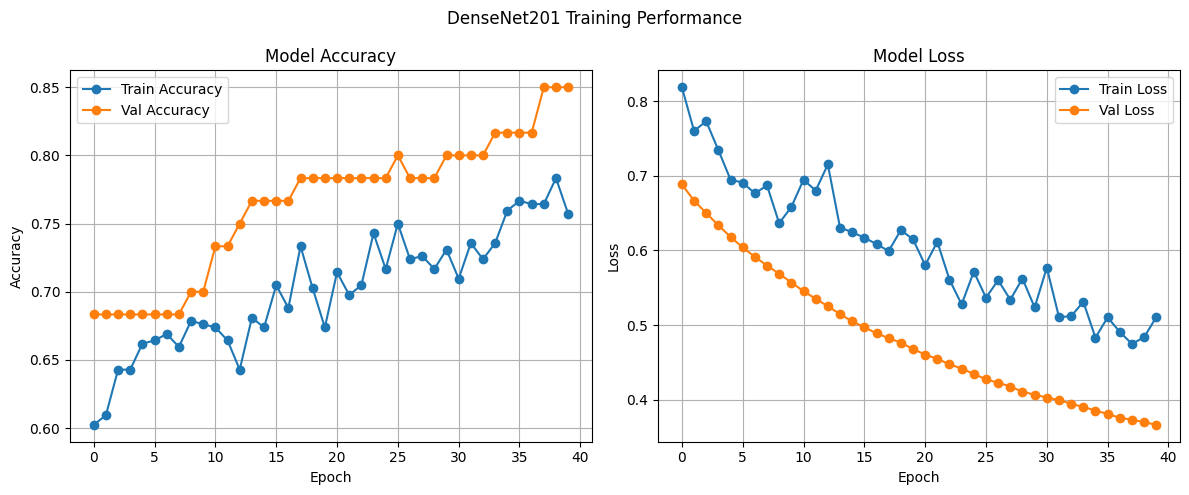

In [ ]:
def plot_training(history, title='DenseNet201 Training Performance'):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_training(history)

Found 120 images belonging to 2 classes.


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 45s 9s/step
📊 Classification Report (DenseNet201):
              precision    recall  f1-score   support

     dessert       0.54      0.72      0.62        40
 main_course       0.83      0.69      0.75        80

    accuracy                           0.70       120
   macro avg       0.69      0.71      0.69       120
weighted avg       0.73      0.70      0.71       120



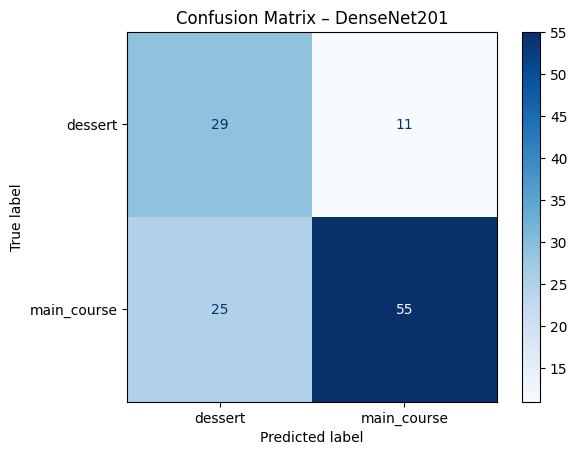

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load DenseNet model
model = tf.keras.models.load_model('/content/drive/MyDrive/food_classifier_densenet201.h5')

# Test data path
test_dir = '/content/drive/MyDrive/filtered_food_subset/test'

# Set up test generator
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict
predictions = model.predict(test_gen)
y_pred = np.argmax(predictions, axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("📊 Classification Report (DenseNet201):")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix – DenseNet201")
plt.grid(False)
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Improved data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/filtered_food_subset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/filtered_food_subset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tune last 30 layers instead of 10
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)  # Added layer for deeper learning
output = Dense(2, activation='softmax')(x)  # Adjust if more than 2 classes

# Final model
mobilenet_model = Model(inputs=base_model.input, outputs=output)

# Compile model
mobilenet_model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
]

# Train model
mobilenet_model.fit(train_gen, validation_data=val_gen, epochs=25, callbacks=callbacks)

# Save model
mobilenet_model.save('/content/drive/MyDrive/filtered_food_subset/mobilenetv2_model.h5')

Found 420 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4474 - loss: 0.9869 - val_accuracy: 0.5833 - val_loss: 0.7289 - learning_rate: 1.0000e-04
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 456ms/step - accuracy: 0.6727 - loss: 0.6467 - val_accuracy: 0.7667 - val_loss: 0.5232 - learning_rate: 1.0000e-04
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 584ms/step - accuracy: 0.7973 - loss: 0.4808 - val_accuracy: 0.8000 - val_loss: 0.4397 - learning_rate: 1.0000e-04
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 509ms/step - accuracy: 0.8244 - loss: 0.3813 - val_accuracy: 0.8333 - val_loss: 0.3836 - learning_rate: 1.0000e-04
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 564ms/step - accuracy: 0.8818 - loss: 0.3026 - val_accuracy: 0.8500 - val_loss: 0.3409 - learning_rate: 1.0000e-04
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 459ms/step - accuracy: 0.9226 - loss: 0.2190 - val_accuracy: 0.8333 - val_loss: 0.3062 - learning_ra

Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 624ms/step - accuracy: 0.9824 - loss: 0.0962 - val_accuracy: 0.8500 - val_loss: 0.2677 - learning_rate: 4.0000e-06
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 449ms/step - accuracy: 0.9765 - loss: 0.0875 - val_accuracy: 0.8500 - val_loss: 0.2716 - learning_rate: 4.0000e-06
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 549ms/step - accuracy: 0.9498 - loss: 0.1223 - val_accuracy: 0.8500 - val_loss: 0.2764 - learning_rate: 4.0000e-06
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 452ms/step - accuracy: 0.9761 - loss: 0.0836 - val_accuracy: 0.8500 - val_loss: 0.2784 - learning_rate: 4.0000e-06
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 539ms/step - accuracy: 0.9819 - loss: 0.0903 - val_accuracy: 0.8500 - val_loss: 0.2806 - learning_rate: 1.0000e-06
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 465ms/step - accuracy: 0.9610 - loss: 0.0932 - val_accuracy: 0.8500 - val_loss: 0.2825 - learning_rate: 1.0000e-06


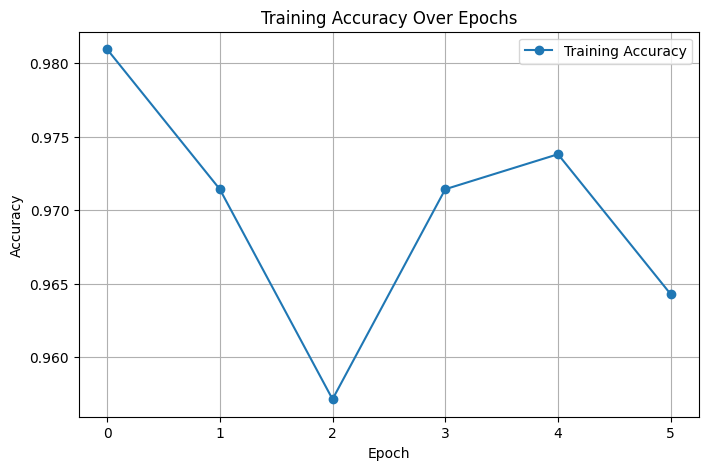

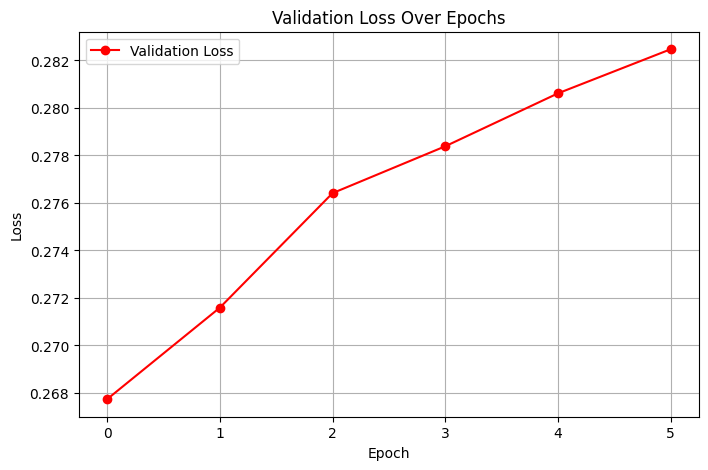

In [ ]:
import matplotlib.pyplot as plt

# Train and store history
history = mobilenet_model.fit(train_gen, validation_data=val_gen, epochs=25, callbacks=callbacks)

# Plot Training Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', marker='o')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Found 120 images belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 10s/step
📊 Classification Report:
              precision    recall  f1-score   support

     dessert       0.90      0.68      0.77        40
 main_course       0.86      0.96      0.91        80

    accuracy                           0.87       120
   macro avg       0.88      0.82      0.84       120
weighted avg       0.87      0.87      0.86       120



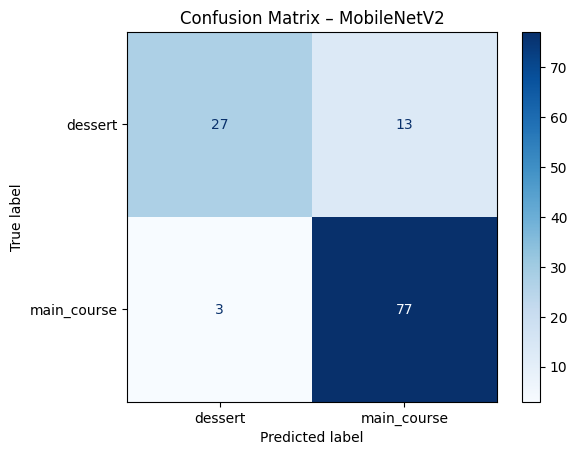

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the trained model (corrected path)
model = load_model('/content/drive/MyDrive/filtered_food_subset/mobilenetv2_model.h5')

# Test directory
test_dir = '/content/drive/MyDrive/filtered_food_subset/test'

#  Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict
predictions = model.predict(test_gen)
y_pred = np.argmax(predictions, axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix – MobileNetV2")
plt.grid(False)
plt.show()

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Stronger Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/filtered_food_subset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/filtered_food_subset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Callbacks
callbacks = [
    EarlyStopping(patience=6, monitor='val_loss', restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
]

# Load EfficientNetB0 Base Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze last 40 layers
for layer in base_model.layers[:-40]:
    layer.trainable = False

# Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)  # Extra dense layer for better learning
output = Dense(2, activation='softmax')(x)  # Adjust if more classes

# Build Final Model
efficientnet_model = Model(inputs=base_model.input, outputs=output)

# Compile
efficientnet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = efficientnet_model.fit(train_gen, validation_data=val_gen, epochs=25, callbacks=callbacks)

# Save
efficientnet_model.save('/content/drive/MyDrive/food_classifier_efficientnetb0.h5')

Found 420 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.4974 - loss: 0.8950 - val_accuracy: 0.6667 - val_loss: 0.6573 - learning_rate: 1.0000e-04
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 484ms/step - accuracy: 0.5976 - loss: 0.7962 - val_accuracy: 0.6667 - val_loss: 0.6461 - learning_rate: 1.0000e-04
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 579ms/step - accuracy: 0.5454 - loss: 0.8311 - val_accuracy: 0.6667 - val_loss: 0.6462 - learning_rate: 1.0000e-04
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 483ms/step - accuracy: 0.5688 - loss: 0.8148 - val_accuracy: 0.6667 - val_loss: 0.6417 - learning_rate: 1.0000e-04
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 592ms/step - accuracy: 0.6336 - loss: 0.7590 - val_accuracy: 0.6667 - val_loss: 0.6389 - learning_rate: 1.0000e-04
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 508ms/step - accuracy: 0.6193 - loss: 0.7085 - val_accuracy: 0.6667 - val_loss: 0.6375 - learning_ra

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#  Paths
train_dir = "/content/drive/MyDrive/filtered_food_subset/train"
val_dir = "/content/drive/MyDrive/filtered_food_subset/val"

#  Image generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)
val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)

#  Load base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-10]:
    layer.trainable = False

#  Custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

#  Compile
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

#  Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

#  Train
history = model.fit(train_gen, validation_data=val_gen, epochs=25, callbacks=callbacks)

# Save model
model.save("/content/drive/MyDrive/food_classifier_resnet50.h5")

Found 420 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 167s 11s/step - accuracy: 0.5907 - loss: 0.9433 - val_accuracy: 0.3333 - val_loss: 0.7793 - learning_rate: 1.0000e-05
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.6833 - loss: 0.7528 - val_accuracy: 0.3500 - val_loss: 0.7584 - learning_rate: 1.0000e-05
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.7161 - loss: 0.5666 - val_accuracy: 0.3667 - val_loss: 0.7327 - learning_rate: 1.0000e-05
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.7313 - loss: 0.5488 - val_accuracy: 0.4333 - val_loss: 0.7059 - learning_rate: 1.0000e-05
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.7769 - loss: 0.4525 - val_accuracy: 0.5667 - val_loss: 0.6862 - learning_rate: 1.0000e-05
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.8532 - loss: 0.3751 - val_accuracy: 0.5500 - val_loss: 0.6800 - learning_rate: 1.0000e-05
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 

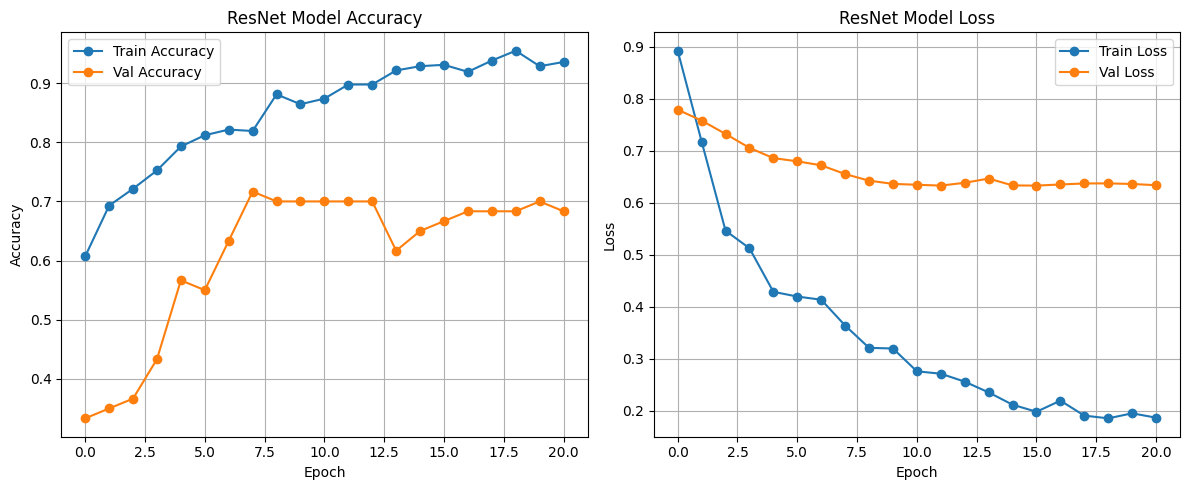

In [ ]:
import matplotlib.pyplot as plt

def plot_resnet_graphs(history_resnet):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_resnet.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history_resnet.history['val_accuracy'], label='Val Accuracy', marker='o')
    plt.title('ResNet Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history_resnet.history['loss'], label='Train Loss', marker='o')
    plt.plot(history_resnet.history['val_loss'], label='Val Loss', marker='o')
    plt.title('ResNet Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_resnet_graphs(history)

Found 120 images belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 54s 17s/step
 Classification Report:
              precision    recall  f1-score   support

     dessert       0.44      0.28      0.34        40
 main_course       0.69      0.82      0.75        80

    accuracy                           0.64       120
   macro avg       0.57      0.55      0.55       120
weighted avg       0.61      0.64      0.62       120



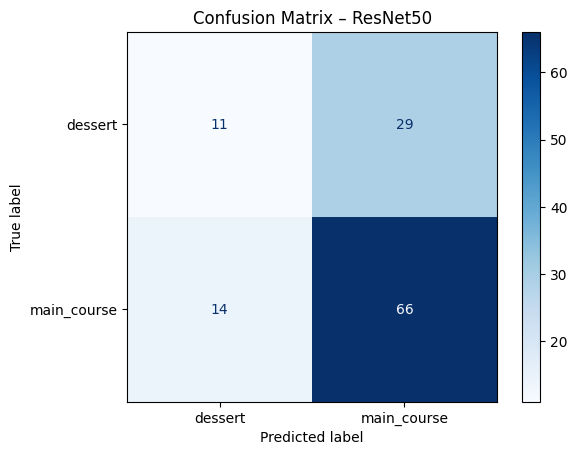

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load your trained ResNet model
model = load_model("/content/drive/MyDrive/food_classifier_resnet50.h5")

#  Test directory path
test_dir = "/content/drive/MyDrive/filtered_food_subset/test"

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict
predictions = model.predict(test_gen)
y_pred = np.argmax(predictions, axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Print classification report
print(" Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

#  Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix – ResNet50")
plt.grid(False)
plt.show()